In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle


In [2]:
dataset = 'SMD'
data_path = "../ServerMachineDataset/processed"
x_dim = 38

file = 1, 1

In [3]:
f = open(f'{data_path}/machine-{file[0]}-{file[1]}_train.pkl', "rb")
data = pickle.load(f).reshape((-1, x_dim))
f.close()
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.032258,0.039195,0.027871,0.024390,0.0,0.915385,0.343691,0.0,0.020011,0.000122,...,0.0,0.004298,0.029993,0.022131,0.0,0.000045,0.034677,0.034747,0.0,0.0
1,0.043011,0.048729,0.033445,0.025552,0.0,0.915385,0.344633,0.0,0.019160,0.001722,...,0.0,0.004298,0.030041,0.028821,0.0,0.000045,0.035763,0.035833,0.0,0.0
2,0.043011,0.034958,0.032330,0.025552,0.0,0.915385,0.344633,0.0,0.020011,0.000122,...,0.0,0.004298,0.026248,0.021101,0.0,0.000045,0.033012,0.033082,0.0,0.0
3,0.032258,0.028602,0.030100,0.024390,0.0,0.912821,0.342750,0.0,0.021289,0.000000,...,0.0,0.004298,0.030169,0.025733,0.0,0.000022,0.035112,0.035182,0.0,0.0
4,0.032258,0.019068,0.026756,0.023229,0.0,0.912821,0.342750,0.0,0.018734,0.000000,...,0.0,0.004298,0.027240,0.022645,0.0,0.000034,0.033447,0.033517,0.0,0.0


<Figure size 432x288 with 0 Axes>

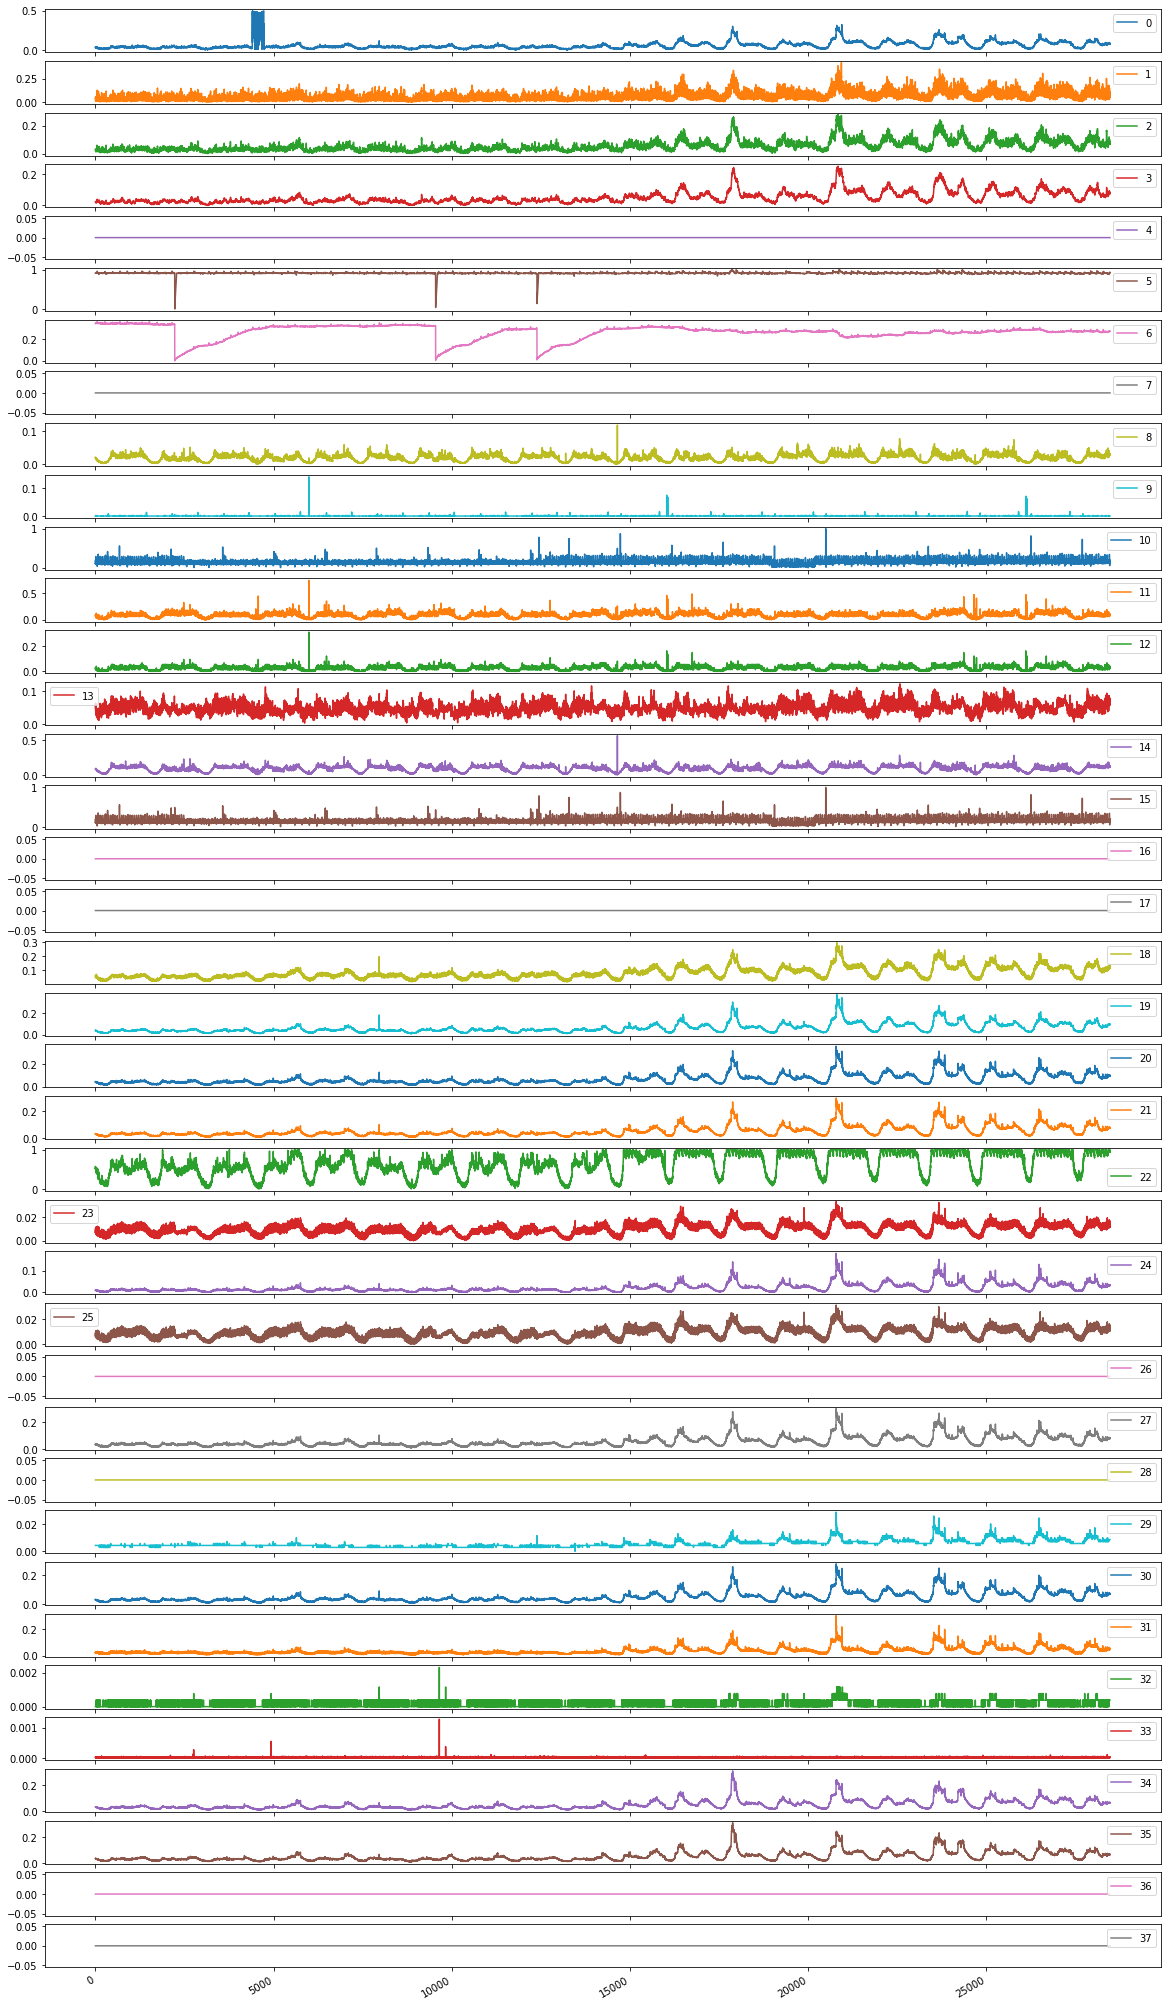

In [4]:
plt.tight_layout()
df.plot(subplots=True, figsize=(20,40))
plt.show();

In [6]:
f = open(f'{data_path}/machine-{file[0]}-{file[1]}_test.pkl', "rb")
data = pickle.load(f).reshape((-1, x_dim))
f.close()
df_test = pd.DataFrame(data)

f = open(f'{data_path}/machine-{file[0]}-{file[1]}_test_label.pkl', "rb")
test_labels = pickle.load(f)
f.close()
df_test['Anomaly'] = test_labels

<Figure size 432x288 with 0 Axes>

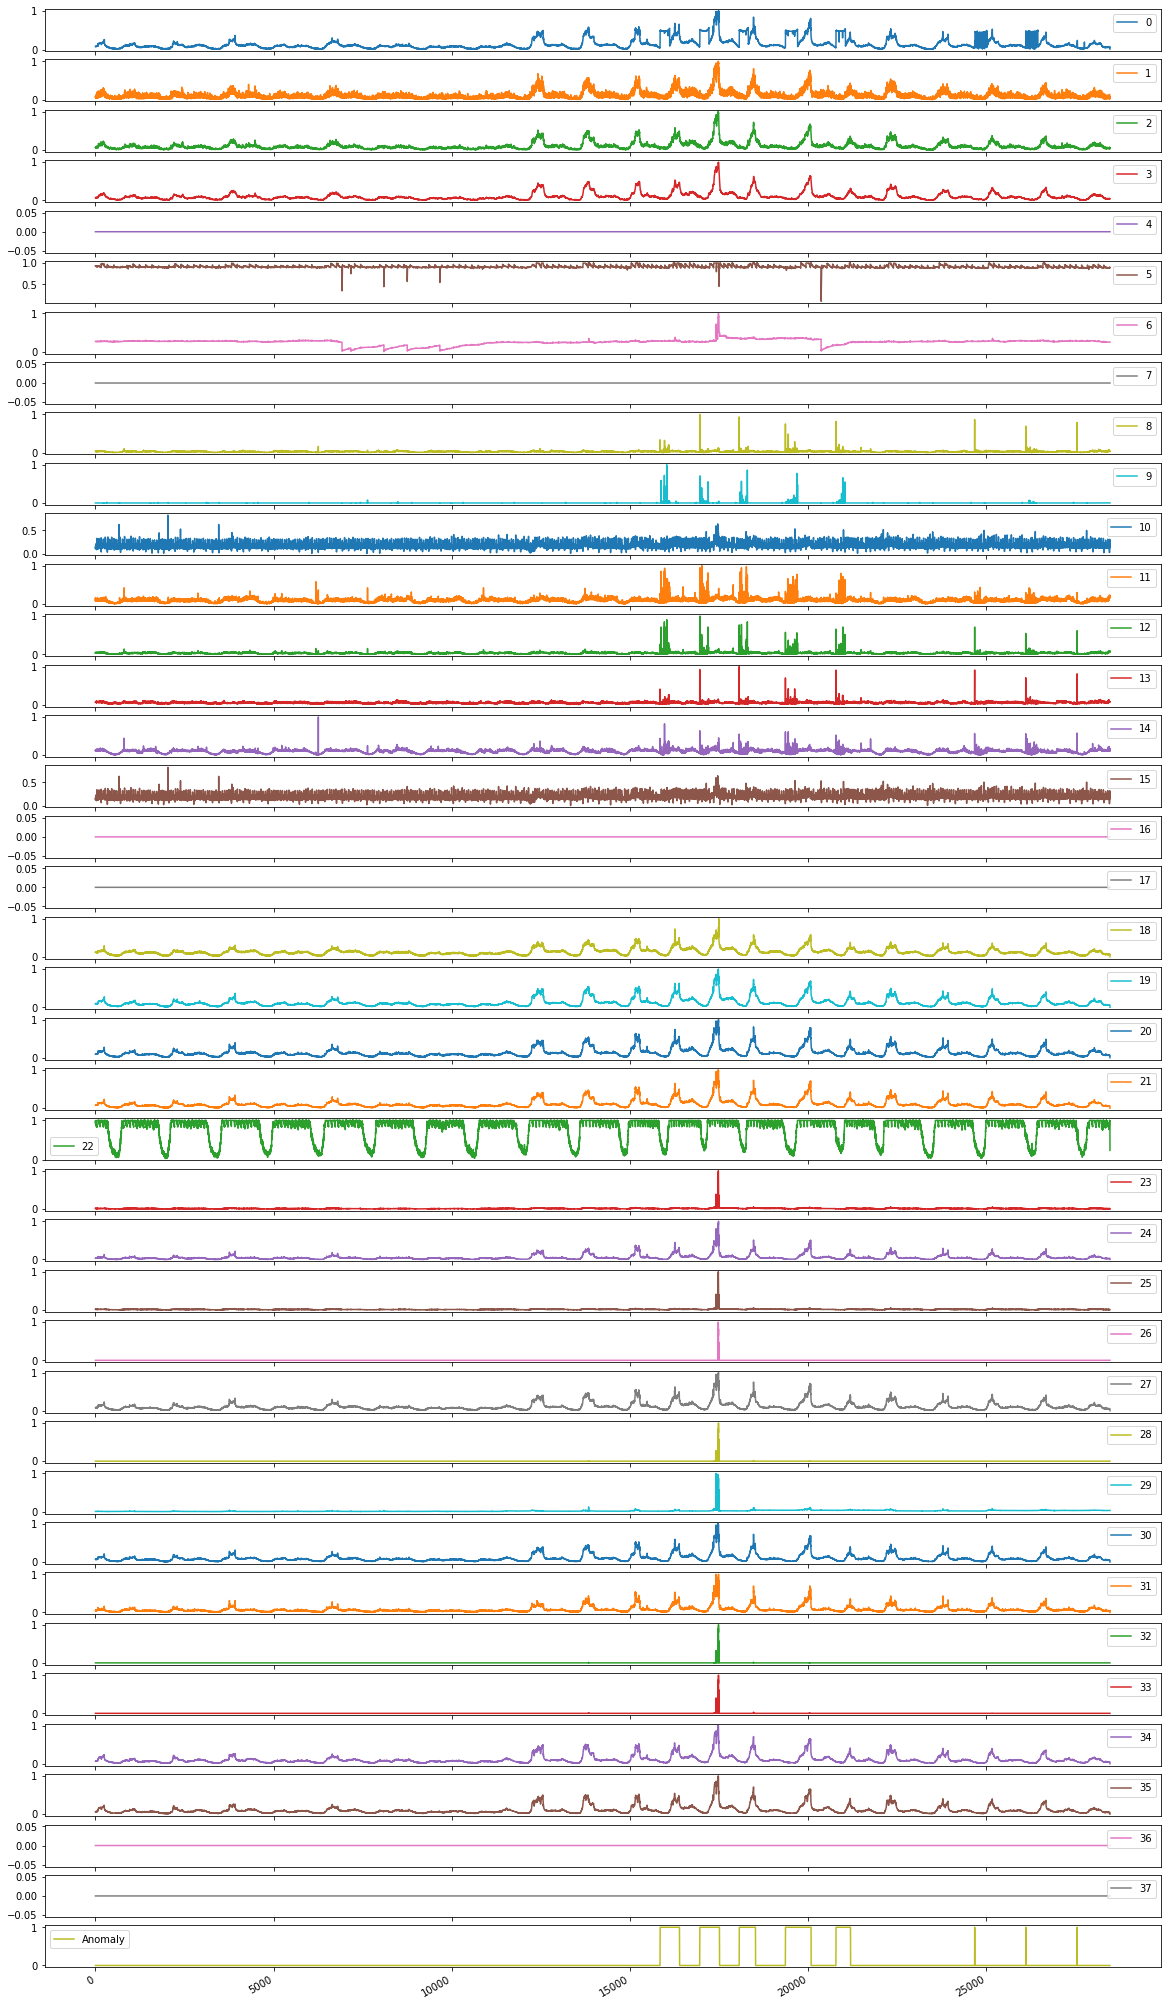

In [7]:
plt.tight_layout()
df_test.plot(subplots=True, figsize=(20,40))
plt.show();

In [8]:
df.shape[0] + df_test.shape[0]

56958

In [9]:
df_comb = pd.concat([df, df_test], ignore_index=True)
df_comb.shape

(56958, 39)

<Figure size 432x288 with 0 Axes>

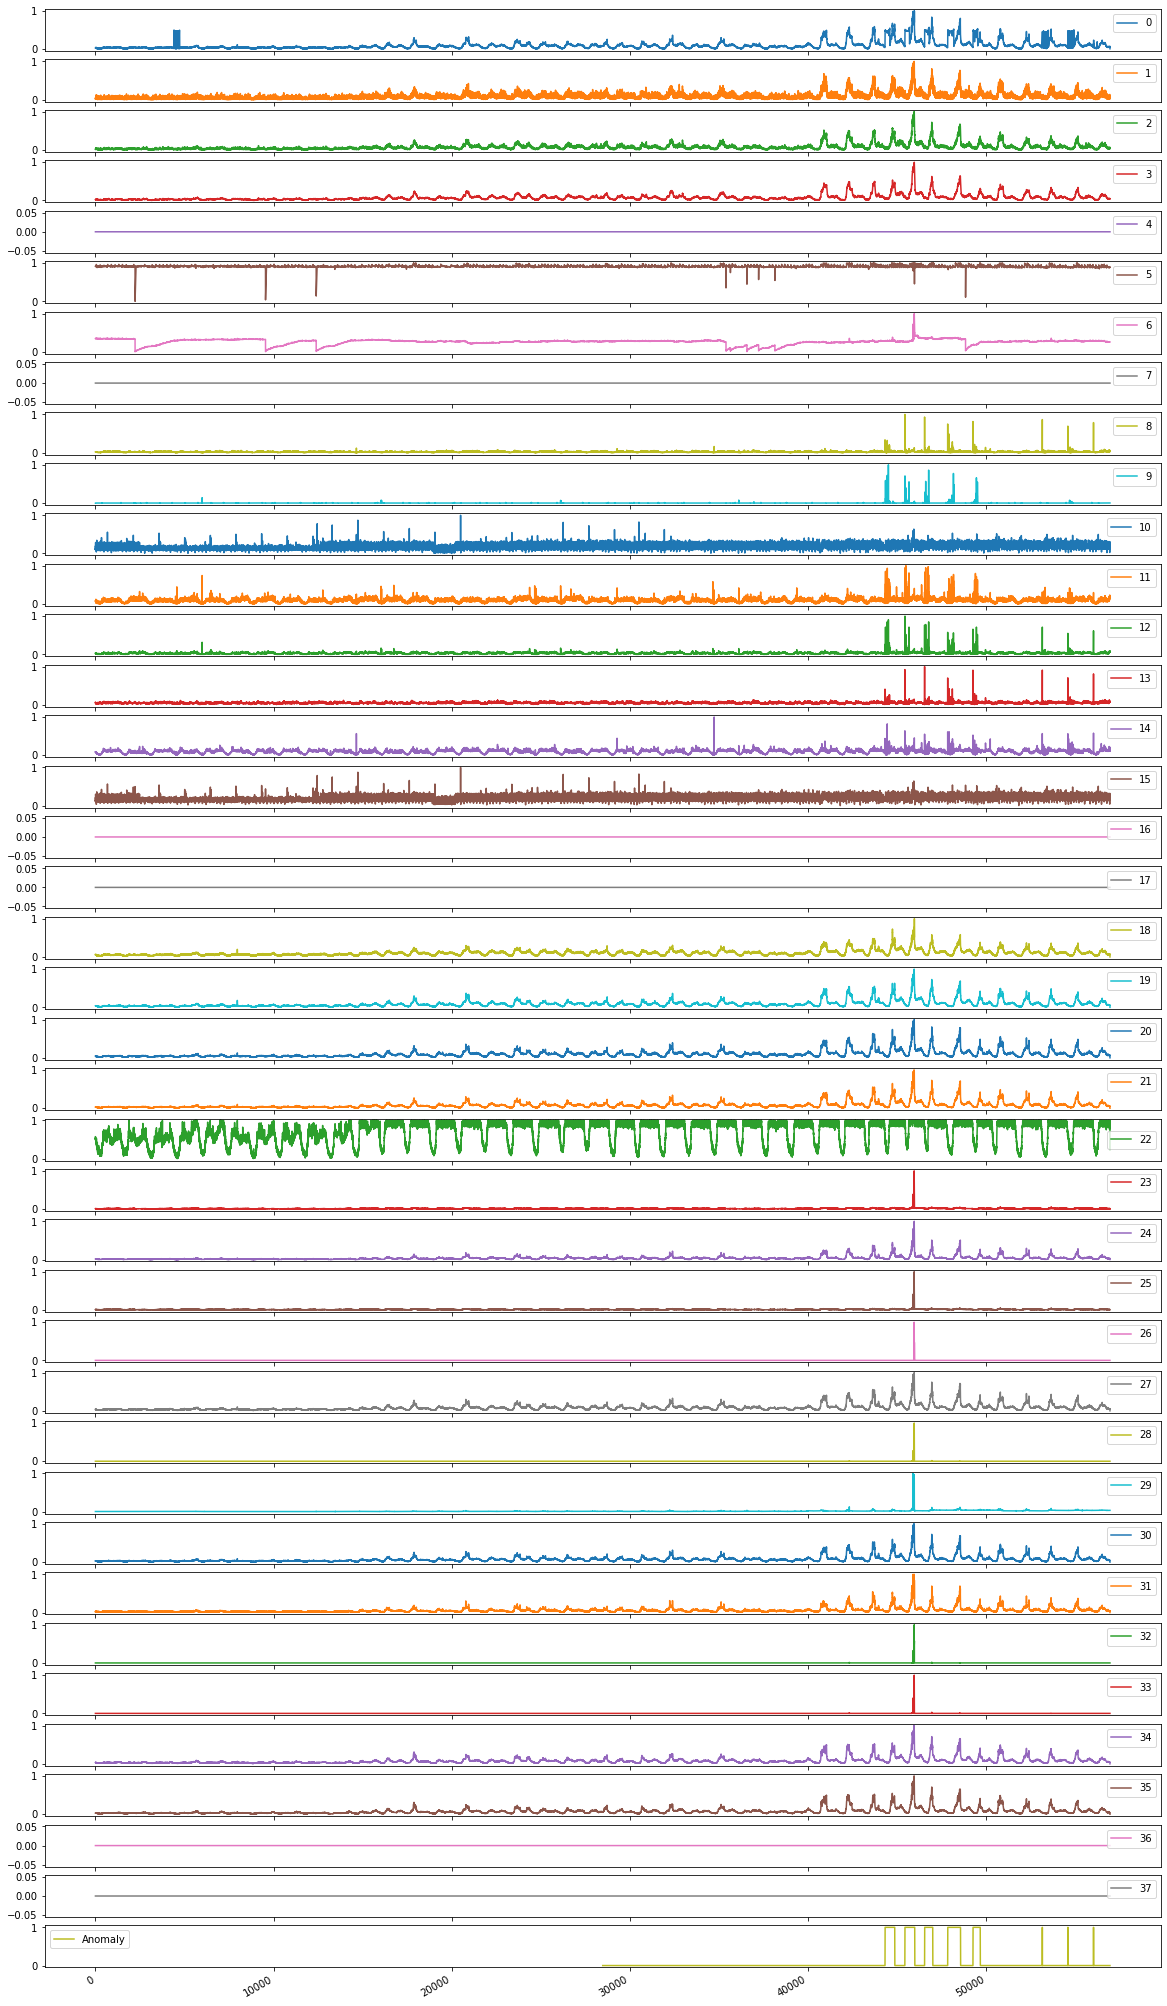

In [10]:
plt.tight_layout()
df_comb.plot(subplots=True, figsize=(20,40))
plt.show();

In [10]:
from alibi_detect.od import SpectralResidual
from alibi_detect.utils.visualize import plot_instance_score, plot_feature_outlier_ts
from scipy import interpolate

od = SpectralResidual(
    threshold=None,
    window_amp=500,
    window_local=500,
    n_est_points=10,
    n_grad_points=5
)

No threshold level set. Need to infer threshold using `infer_threshold`.


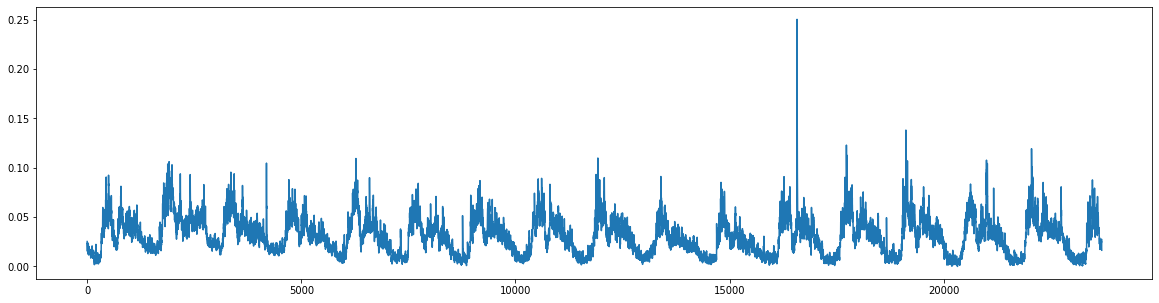

In [11]:
x = df.iloc[:,2].values
plt.figure(figsize=(20, 5))
plt.plot(x)

In [12]:
od.infer_threshold(x, threshold_perc=99.9)
od.threshold

4.166644035446716

In [13]:
preds = od.predict(
    x,
    #t=t,  # array with timesteps, assumes dt=1 between observations if omitted
    return_instance_score=True
)

In [14]:
preds

{'data': {'instance_score': array([ 6.96504892,  1.79670882,  3.63287959, ..., -0.42278145,
          0.37681006, -0.77091269]),
  'feature_score': None,
  'is_outlier': array([1, 0, 0, ..., 0, 0, 0])},
 'meta': {'name': 'SpectralResidual',
  'detector_type': 'online',
  'data_type': 'time-series'}}

In [15]:
a_scores = preds['data']['instance_score']
is_a = preds['data']['is_outlier']

print(is_a.shape)
print(x.shape)

(23693,)
(23693,)


In [16]:
x_interp = x.copy()
x_interp[np.where(is_a == 1)] = np.NaN
x_interp = pd.Series(x_interp)
print(pd.isna(x_interp).sum())
x_interp = x_interp.interpolate(method='pad')
print(pd.isna(x_interp).sum())

24
1


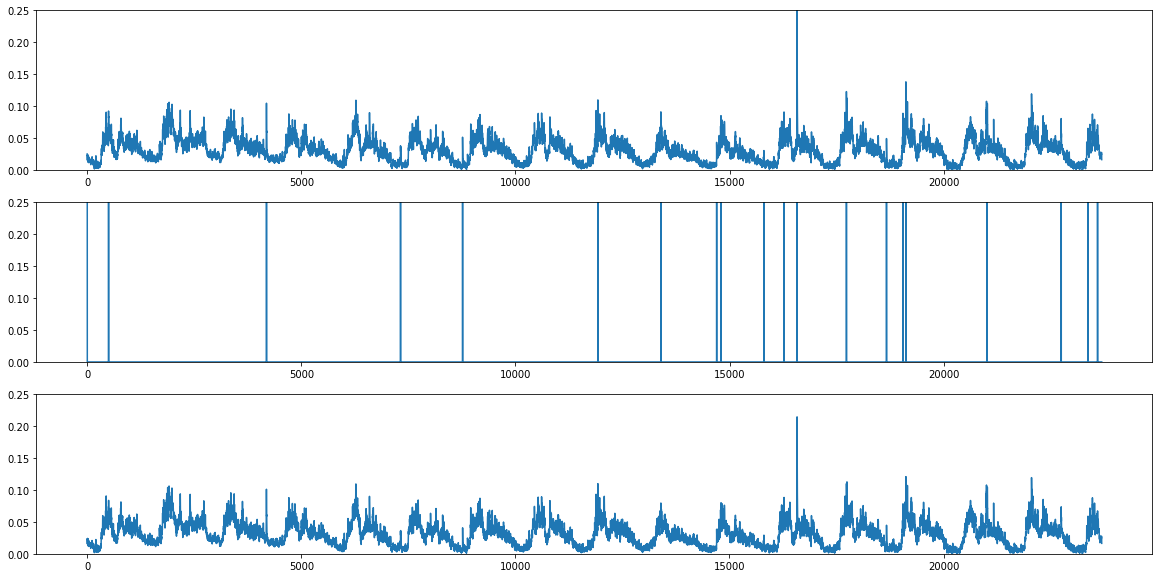

In [17]:

fig, axs = plt.subplots(3, figsize=(20,10))
axs[0].set_ylim([0, max(x)])
axs[1].set_ylim([0, max(x)])
axs[2].set_ylim([0, max(x)])

axs[0].plot(x)
axs[1].plot(is_a)
axs[2].plot(x_interp)


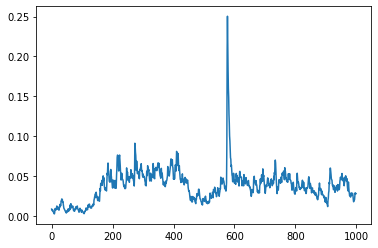

In [18]:
plt.plot(x[16000:17000])

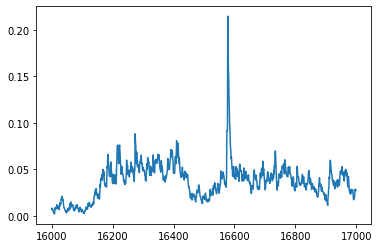

In [19]:
plt.plot(x_interp[16000:17000])

In [11]:
# output = pd.read_csv('../output/smd/machine-1-1_test.csv')
output = pd.read_pickle('../output/smd/machine-1-1_test.pkl')

In [12]:
output.head()

,Pred_0,True_0,Recon_0,True_Recon_0,RSE_0,Pred_1,True_1,Recon_1,True_Recon_1,RSE_1,...,Recon_36,True_Recon_36,RSE_36,Pred_37,True_37,Recon_37,True_Recon_37,RSE_37,Pred_Anomaly,True_Anomaly
0,0.0,0.0,0.073716,0.075269,0.0,0.0,0.0,0.066903,0.065678,0.0,...,-0.003903,0.0,0.0,0.0,0.0,-0.001226,0.0,0.0,-1,0.0
1,0.0,0.0,0.074519,0.086022,0.0,0.0,0.0,0.066702,0.080508,0.0,...,0.000362,0.0,0.0,0.0,0.0,0.003137,0.0,0.0,-1,0.0
2,0.0,0.0,0.075382,0.075269,0.0,0.0,0.0,0.062458,0.064619,0.0,...,-0.002627,0.0,0.0,0.0,0.0,0.000437,0.0,0.0,-1,0.0
3,0.0,0.0,0.075776,0.086022,0.0,0.0,0.0,0.064366,0.048729,0.0,...,-0.003215,0.0,0.0,0.0,0.0,0.000609,0.0,0.0,-1,0.0
4,0.0,0.0,0.074594,0.086022,0.0,0.0,0.0,0.064045,0.051907,0.0,...,-0.002352,0.0,0.0,0.0,0.0,0.000477,0.0,0.0,-1,0.0


<Figure size 432x288 with 0 Axes>

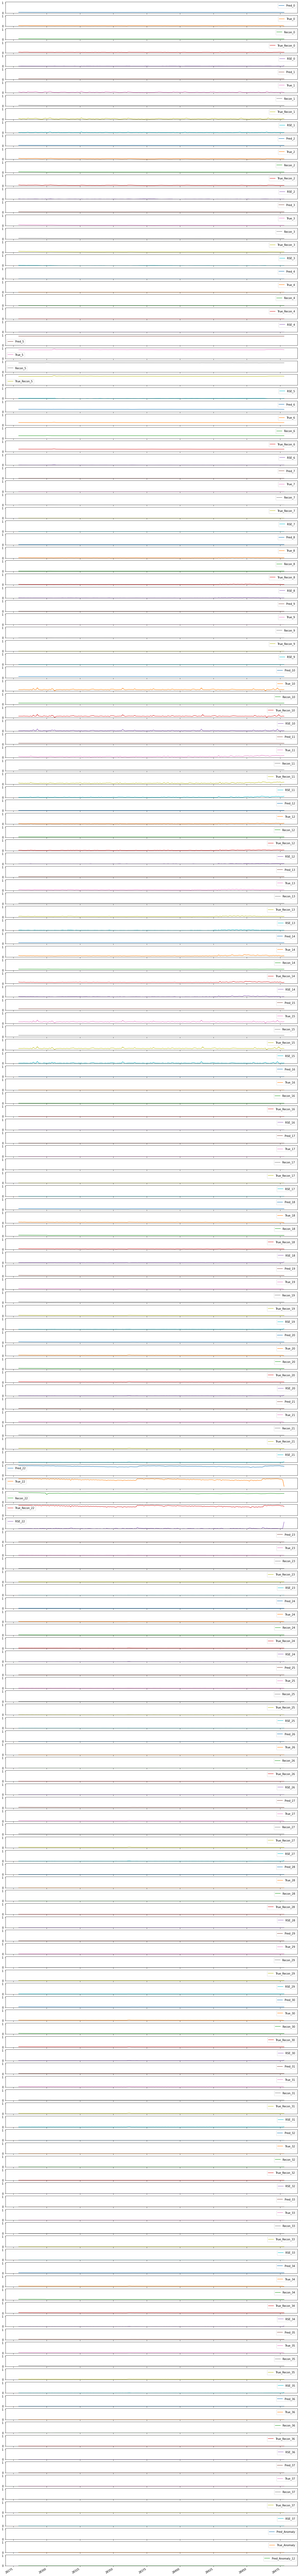

In [50]:
plt.tight_layout()
output.iloc[-200:].plot(subplots=True, figsize=(20,200), ylim=(0,1.1))
plt.show();

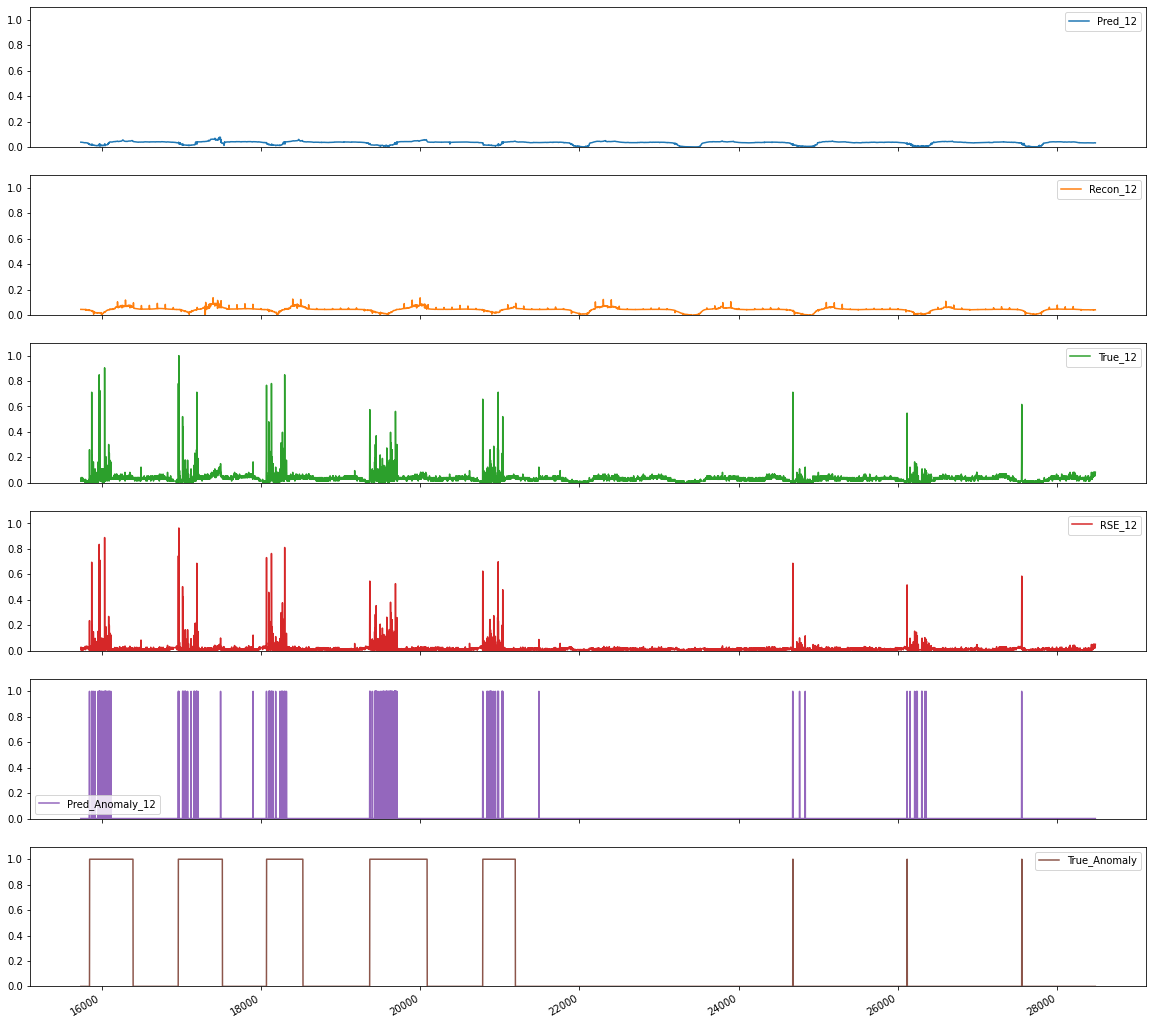

In [20]:
i = 12

# Calculate threshold loss = mean + 3std
rses = output.loc[:, f'RSE_{i}']
thresh = np.mean(rses) + 3*np.std(rses)

output[f'Pred_Anomaly_{i}'] = (rses > thresh).astype(int)

start, end = 15849, 16368
df = output.loc[start-110:, [f'Pred_{i}', f'Recon_{i}',f'True_{i}', f'RSE_{i}', f'Pred_Anomaly_{i}','True_Anomaly']]
df.plot(subplots=True, figsize=(20, 20), ylim=(0,1.1))
plt.show()

In [18]:
print(precision_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))
print(recall_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))
print(f1_score(output['True_Anomaly'], output[f'Pred_Anomaly_{i}']))

0.8863636363636364
0.07238307349665925
0.1338366506520247


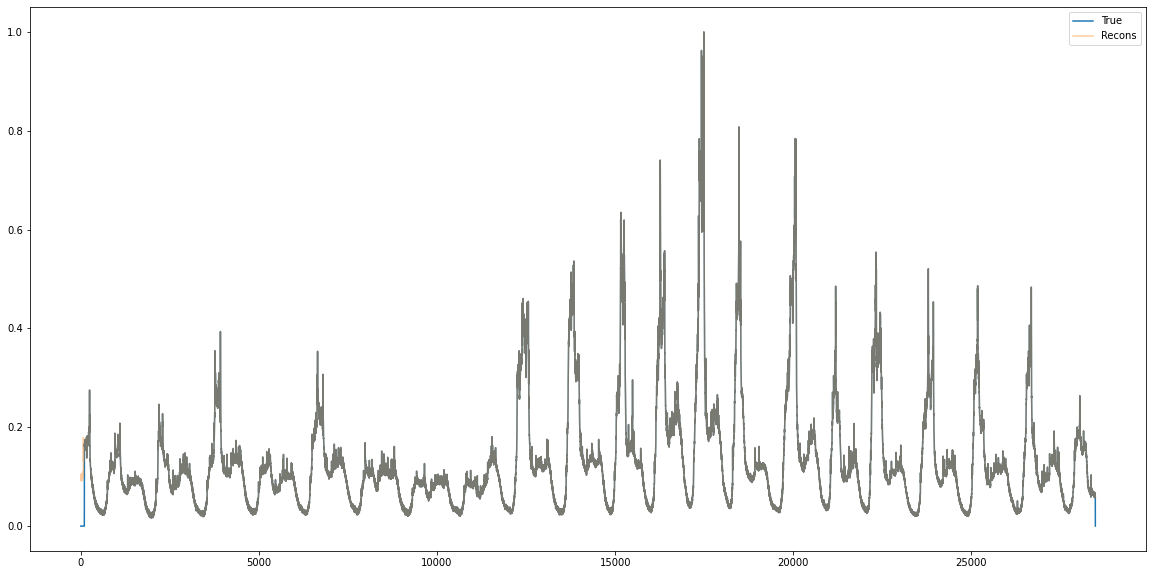

In [24]:
i = 20
plt.figure(figsize=(20, 10))
true = output.loc[:, [f'True_{i}']]
recons = output.loc[:, [f'True_Recon_{i}']]
plt.plot(true.values, label='True')
plt.plot(recons.values, label='Recons', alpha=0.4)

plt.legend()

In [49]:
t = true[100:].values
r = recons[100:].values

equals = (t == r)
print(np.where(equals == False))

(array([28300, 28301, 28302, 28303, 28304, 28305, 28306, 28307, 28308,
       28309, 28310, 28311, 28312, 28313, 28314, 28315, 28316, 28317,
       28318, 28319, 28320, 28321, 28322, 28323, 28324, 28325, 28326,
       28327, 28328, 28329, 28330, 28331, 28332, 28334, 28335, 28336,
       28337, 28338, 28339, 28340, 28341, 28342, 28343, 28344, 28345,
       28346, 28347, 28348, 28349, 28350, 28351, 28352, 28353, 28354,
       28355, 28356, 28357, 28358, 28359, 28360, 28361, 28362, 28363,
       28364, 28365, 28366, 28367, 28368, 28369, 28370, 28371, 28372,
       28373, 28374, 28375, 28376, 28377, 28378]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


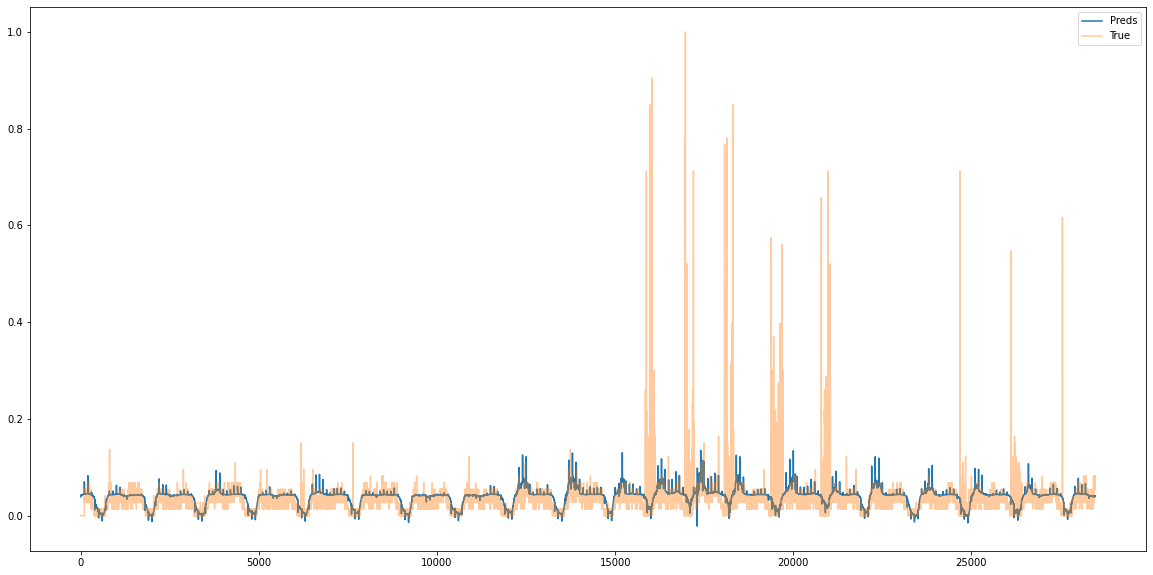

In [16]:

# Plot
plt.figure(figsize=(20, 10))
preds = output.loc[:, [f'Pred_{i}']]
true_y = output.loc[:, [f'True_{i}']]
plt.plot(preds.values, label='Preds')
plt.plot(true_y.values, label='True', alpha=0.4)

plt.legend()

In [20]:
# Compute anomaly for every feature
for i in range(38):
    rses = output.loc[:, f'RSE_{i}']
    thresh = np.mean(rses) + 20*np.std(rses)
    
    output[f'Pred_Anomaly_{i}'] = (rses > thresh).astype(int)

anomaly_preds = output.loc[:, [f'Pred_Anomaly_{i}' for i in range(38)]]
print(anomaly_preds.shape)

output['Pred_Anomaly_Global'] = (np.sum(anomaly_preds, 1) > 1).astype(int)
output.head()

(28378, 38)


,Pred_0,True_0,RSE_0,Pred_1,True_1,RSE_1,Pred_2,True_2,RSE_2,Pred_3,...,Pred_Anomaly_29,Pred_Anomaly_30,Pred_Anomaly_31,Pred_Anomaly_32,Pred_Anomaly_33,Pred_Anomaly_34,Pred_Anomaly_35,Pred_Anomaly_36,Pred_Anomaly_37,Pred_Anomaly_Global
0,0.152667,0.150538,0.002129,0.138314,0.153602,0.015288,0.139469,0.147157,0.007688,0.138006,...,0,0,0,0,0,0,0,0,0,0
1,0.152278,0.161290,0.009012,0.137965,0.159958,0.021993,0.139098,0.149387,0.010289,0.137623,...,0,0,0,0,0,0,0,0,0,0
2,0.153209,0.161290,0.008081,0.138727,0.150424,0.011697,0.139909,0.151616,0.011707,0.138425,...,0,0,0,0,0,0,0,0,0,0
3,0.155557,0.161290,0.005733,0.140792,0.115466,0.025326,0.142122,0.140468,0.001654,0.140712,...,0,0,0,0,0,0,0,0,0,0
4,0.155624,0.161290,0.005666,0.140856,0.137712,0.003144,0.142143,0.140468,0.001675,0.140670,...,0,0,0,0,0,0,0,0,0,0


In [21]:
w = 50
i = w
output['Smooth_Pred_Anomaly_Global'] = 0
while i < output.shape[0]:
    if output.loc[i, 'Pred_Anomaly_Global'] == 1:
        output.loc[i:i+w, 'Smooth_Pred_Anomaly_Global'] = 1
        i += 1
    else:
        i += 1
        

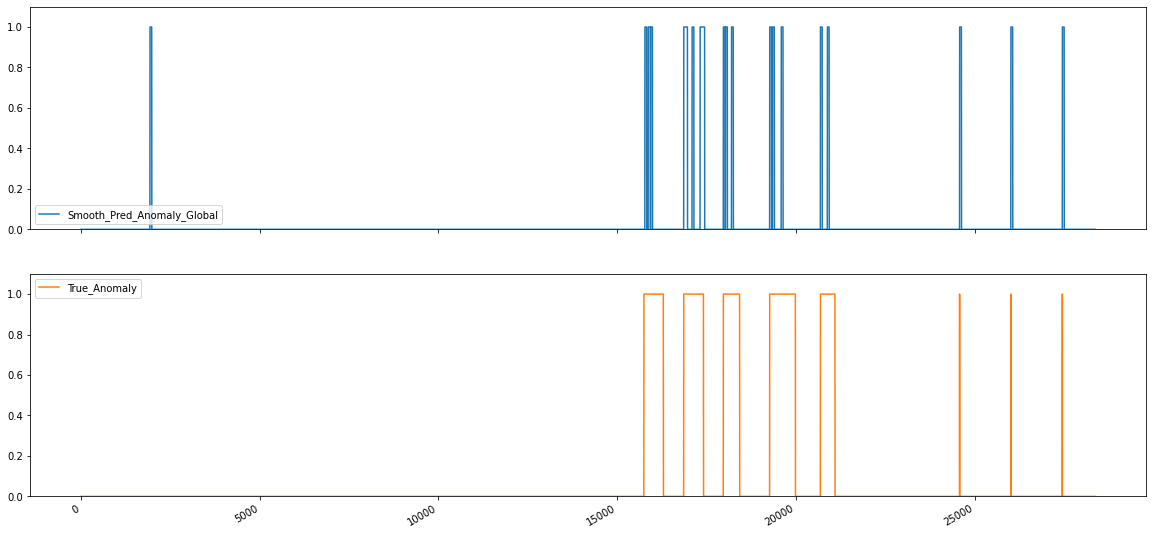

In [22]:
output.loc[:, [f'Smooth_Pred_Anomaly_Global', 'True_Anomaly']].plot(subplots=True, figsize=(20, 10), ylim=(0,1.1))
plt.show()

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [31]:
precision_score(output['True_Anomaly'], output['Smooth_Pred_Anomaly_Global'])

0.4865040650406504

In [32]:
recall_score(output['True_Anomaly'], output['Smooth_Pred_Anomaly_Global'])

0.5553080920564217

In [33]:
f1_score(output['True_Anomaly'], output['Smooth_Pred_Anomaly_Global'])

0.5186340786964811

In [28]:
output['mean_rse'] = np.mean(output.iloc[:, 2:-41:3], 1)


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

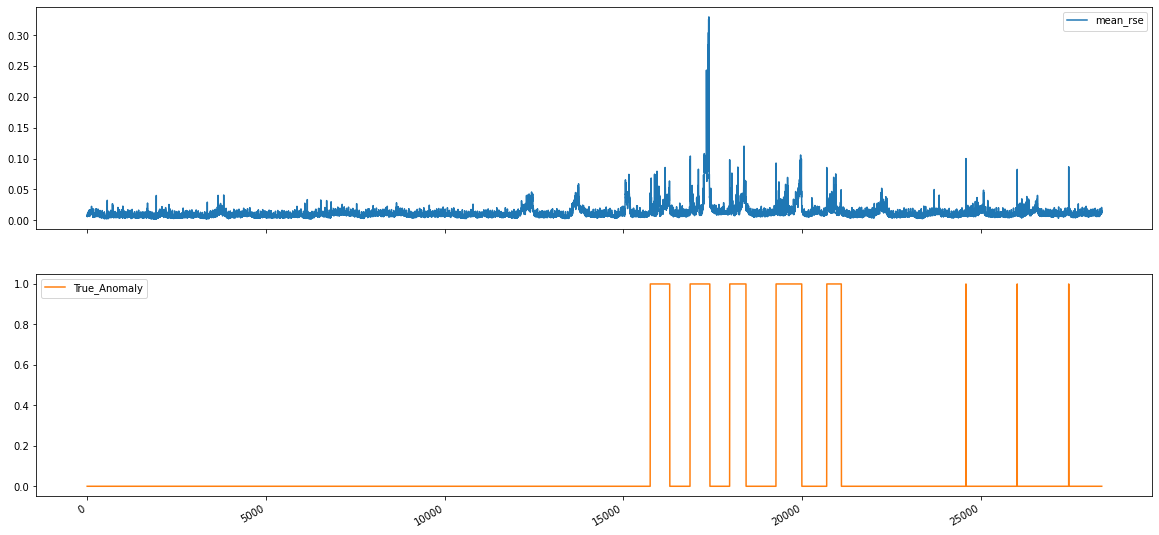

In [29]:
output.loc[:, [f'mean_rse', 'True_Anomaly']].plot(subplots=True, figsize=(20, 10))

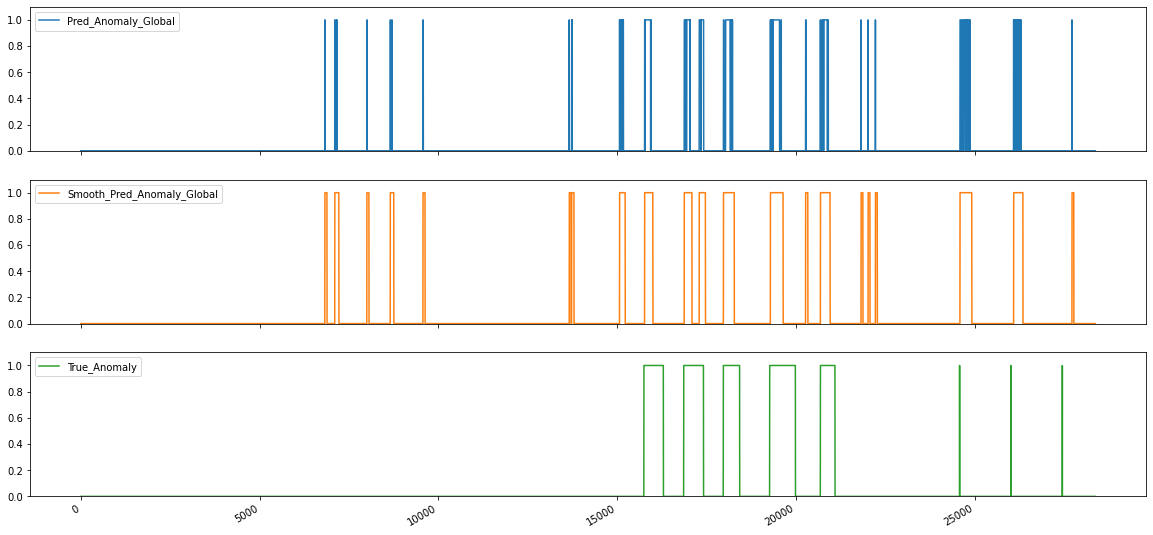

In [30]:
mean_rse = output['mean_rse']
thresh = np.mean(mean_rse) + 1.5*np.std(mean_rse)
output[f'Pred_Anomaly_Global'] = (mean_rse > thresh).astype(int)

w = 50
i = w
output['Smooth_Pred_Anomaly_Global'] = 0
while i < output.shape[0]:
    if output.loc[i, 'Pred_Anomaly_Global'] == 1:
        output.loc[i:i+w, 'Smooth_Pred_Anomaly_Global'] = 1
        i += 1
    else:
        i += 1

output.loc[:, [f'Pred_Anomaly_Global','Smooth_Pred_Anomaly_Global','True_Anomaly']].plot(subplots=True, figsize=(20, 10), ylim=(0,1.1))
plt.show()

In [155]:
from pyextremes import EVA, __version__
import pyextremes
print("pyextremes", __version__)

pyextremes 2.2.1


In [93]:
df = output.copy()
mock_datetimes = pd.date_range('2000-01-01', periods=df.shape[0], freq='T')
df['datetime'] = mock_datetimes
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.tail()

,Pred_0,True_0,RSE_0,Pred_1,True_1,RSE_1,Pred_2,True_2,RSE_2,Pred_3,...,Pred_Anomaly_31,Pred_Anomaly_32,Pred_Anomaly_33,Pred_Anomaly_34,Pred_Anomaly_35,Pred_Anomaly_36,Pred_Anomaly_37,Pred_Anomaly_Global,Smooth_Pred_Anomaly_Global,mean_rse
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-20 16:53:00,0.073850,0.075269,0.001419,0.070247,0.037076,0.033171,0.066681,0.046823,0.019858,0.063802,...,0,0,0,0,0,0,0,0,0,0.020714
2000-01-20 16:54:00,0.075236,0.075269,0.000033,0.071431,0.051907,0.019524,0.067971,0.047938,0.020033,0.065167,...,0,0,0,0,0,0,0,0,0,0.015270
2000-01-20 16:55:00,0.074409,0.064516,0.009893,0.070711,0.025424,0.045287,0.067201,0.039019,0.028182,0.064370,...,0,0,0,0,0,0,0,0,0,0.011645
2000-01-20 16:56:00,0.073175,0.064516,0.008659,0.069561,0.080508,0.010947,0.066018,0.050167,0.015851,0.063175,...,0,0,0,0,0,0,0,0,0,0.011735
2000-01-20 16:57:00,0.072947,0.064516,0.008431,0.069369,0.056144,0.013225,0.065825,0.047938,0.017887,0.063000,...,0,0,0,0,0,0,0,0,0,0.014644


In [137]:
i = 0
x_i = df.loc[:, 'mean_rse']
model = EVA(data=x_i)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      mean_rse      Size:                              28,378
Start:                       January 2000      End:                         January 2000
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [177]:
model.get_extremes(
    method="POT",
    extremes_type="high",
    #block_size="12H",
    threshold=np.mean(x_i) + 3*np.std(x_i),
    r="5H",
    #errors="raise",
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      mean_rse      Size:                              28,378
Start:                       January 2000      End:                         January 2000
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 18      Extraction method:                    POT
Type:                                high      Threshold:           0.048487280009327505
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='datetime', ylabel='mean_rse'>)

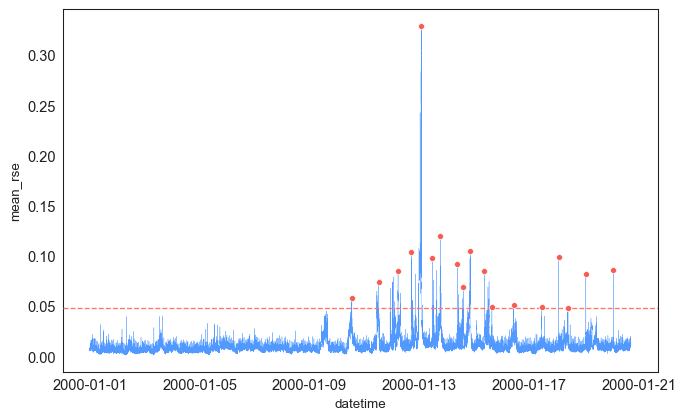

In [178]:
model.plot_extremes()

In [150]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                      mean_rse      Size:                              28,378
Start:                       January 2000      End:                         January 2000
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 18      Extraction method:                    POT
Type:                                high      Threshold:           0.048487280009327505
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='mean_rse'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='mean_rse', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

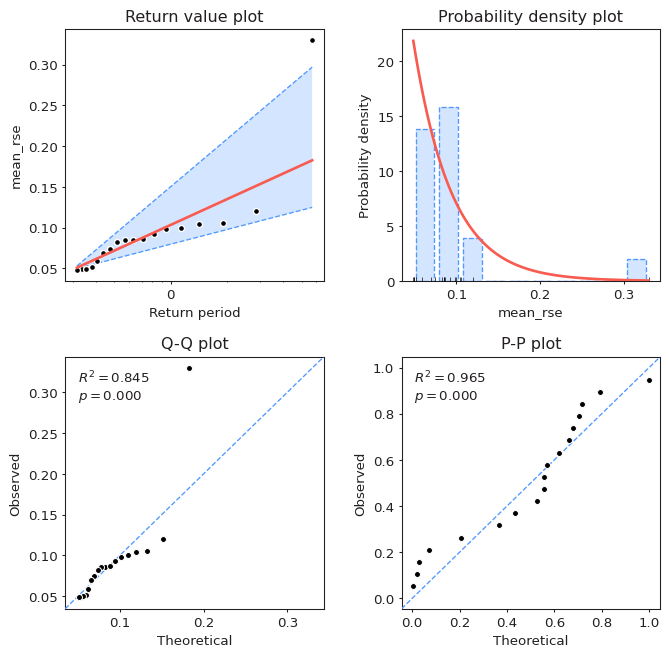

In [151]:
model.plot_diagnostic(alpha=0.95)

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Threshold', ylabel='Mean excess'>)

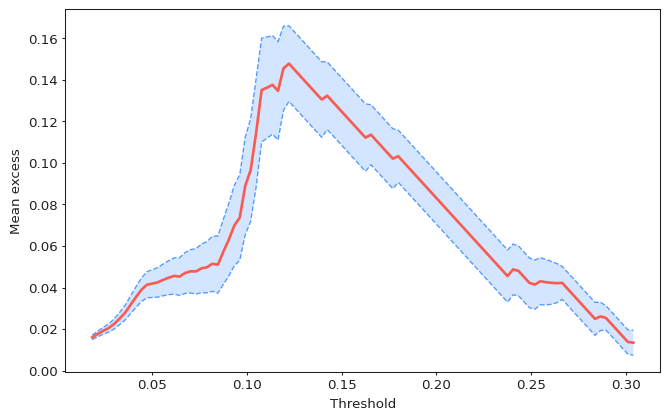

In [156]:
pyextremes.plot_mean_residual_life(ts=x_i)

(<Figure size 768x480 with 2 Axes>,
 (<AxesSubplot:ylabel='Shape, $\\xi$'>,
  <AxesSubplot:xlabel='Threshold', ylabel='Modified scale, $\\sigma^*$'>))

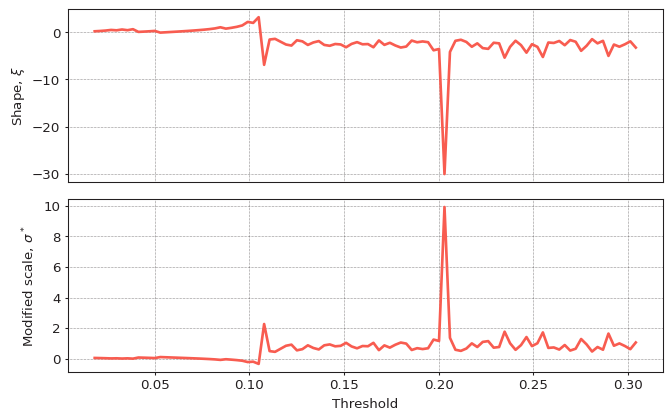

In [157]:
pyextremes.plot_parameter_stability(ts=x_i)

In [165]:
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages

base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('POT') #installing POT package

R[write to console]: trying URL 'https://cloud.r-project.org/bin/macosx/el-capitan/contrib/3.6/POT_1.1-7.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1399205 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


The downloaded binary packages are in
	/var/folders/r7/3_z3p06n3m79fcylhf7268r00000gn/T//RtmpZVcPlE/downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x7f8cc033a100> [RTYPES.NILSXP]

In [166]:
from thresholdmodeling import thresh_modeling

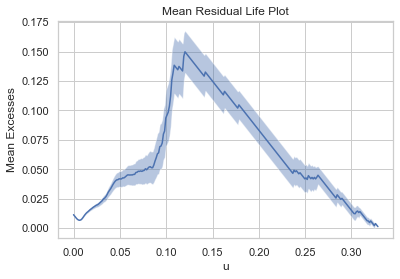

ValueError: Not an rpy2 R object and unable to map it into one: 0.0

In [169]:
thresh_modeling.MRL(x_i.values, 0.05)   
thresh_modeling.Parameter_Stability_plot(x_i.values, 0.05)

In [171]:
thresh_modeling.gpdfit(x_i, 0.04, 'mle')

Estimator: MLE 
 Deviance: -2543.882 
      AIC: -2539.882 

Varying Threshold: FALSE 

  Threshold Call: 0.04 
    Number Above: 508 
Proportion Above: 0.0179 

Estimates
  scale    shape  
0.01909  0.45584  

Standard Error Type: observed 

Standard Errors
  scale    shape  
0.00151  0.06896  

Asymptotic Variance Covariance
       scale       shape     
scale   2.279e-06  -6.547e-05
shape  -6.547e-05   4.756e-03

Optimization Information
  Convergence: successful 
  Function Evaluations: 57 
  Gradient Evaluations: 11 




(0.4558436534478324,
 0.019090373976198872,
 array([0.00160636, 0.00170884, 0.00197044, ..., 0.32482473, 0.32561872,
        0.32970429]),
 [2.472677934210743e-05,
  3.7888593894738753e-05,
  6.419630947367139e-05,
  0.00010020672773684153,
  0.00010082241686842214,
  0.00011718134331577951,
  0.00013397560552631804,
  0.00016177174321051896,
  0.00017515858042631283,
  0.00017558678850000675,
  0.0001766471776315781,
  0.00019129916131578606,
  0.0002593549749473692,
  0.0002620020995413169,
  0.0002710981916578953,
  0.0002899818942105198,
  0.0002921606539473681,
  0.0003451299717631487,
  0.00035081754531578885,
  0.0003881904854736856,
  0.00040949842368420697,
  0.0004114594148157749,
  0.00043838864976316477,
  0.0004475817552631531,
  0.00046056817998948313,
  0.0004917309547368479,
  0.0005094593870263245,
  0.0005777743211315758,
  0.0005935296499473761,
  0.0006578426466315804,
  0.0006911568138605328,
  0.0006920382877894787,
  0.0007022820673947341,
  0.0008309669692631652

Estimator: MLE 
 Deviance: -2543.882 
      AIC: -2539.882 

Varying Threshold: FALSE 

  Threshold Call: 0.04 
    Number Above: 508 
Proportion Above: 0.0179 

Estimates
  scale    shape  
0.01909  0.45584  

Standard Error Type: observed 

Standard Errors
  scale    shape  
0.00151  0.06896  

Asymptotic Variance Covariance
       scale       shape     
scale   2.279e-06  -6.547e-05
shape  -6.547e-05   4.756e-03

Optimization Information
  Convergence: successful 
  Function Evaluations: 57 
  Gradient Evaluations: 11 




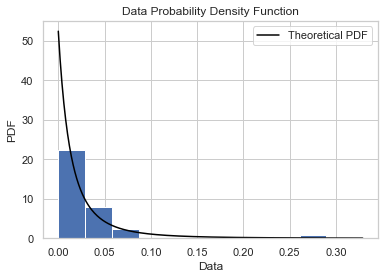

Estimator: MLE 
 Deviance: -2543.882 
      AIC: -2539.882 

Varying Threshold: FALSE 

  Threshold Call: 0.04 
    Number Above: 508 
Proportion Above: 0.0179 

Estimates
  scale    shape  
0.01909  0.45584  

Standard Error Type: observed 

Standard Errors
  scale    shape  
0.00151  0.06896  

Asymptotic Variance Covariance
       scale       shape     
scale   2.279e-06  -6.547e-05
shape  -6.547e-05   4.756e-03

Optimization Information
  Convergence: successful 
  Function Evaluations: 57 
  Gradient Evaluations: 11 




ValueError: x and y must have same first dimension, but have shapes (508,) and (505,)

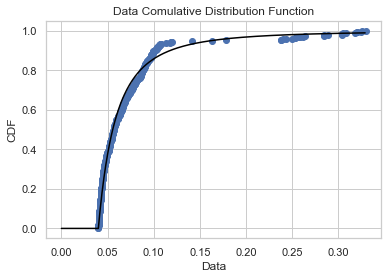

In [172]:
thresh_modeling.gpdpdf(x_i, 0.04, 'mle', 'sturges', 0.05)
thresh_modeling.gpdcdf(x_i, 0.04, 'mle', 0.05)
thresh_modeling.qqplot(x_i, 0.04, 'mle', 0.05)
thresh_modeling.ppplot(x_i, 0.04, 'mle', 0.05)